In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify


In [62]:

df1 = pd.read_excel(r'C:/Users/Admin/Desktop/Sale_Data.xlsx', sheet_name='products')
df1.head()




,product_id,product_name,brand,category
0,E1122,Sony WH-1000XM4 Wireless Premium Noise Canceli...,Sony,Audio
1,E2350,ASUS ROG Strix G15 Gaming Laptop,ASUS,Gaming
2,B09156P11D,Whirlpool WGT4050MWM Whirlpool 5.0 cu. ft. Gas...,Whirlpool,Home Appliances
3,E14560,Tile Pro (2020) 4-Pack Bluetooth Tracker,Tile,Electronics
4,E14563,Canon EOS R Mirrorless Camera with RF 24-105mm...,Canon,Cameras & Photography


In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    71 non-null     object
 1   product_name  71 non-null     object
 2   brand         71 non-null     object
 3   category      70 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [64]:
df1.isnull().sum()

product_id      0
product_name    0
brand           0
category        1
dtype: int64

In [65]:
df1[df1.isnull().any(axis=1)]

,product_id,product_name,brand,category
16,E12353,Anker Soundcore Liberty Air 2 Pro,Anker,NaN


In [89]:
df1.category.unique()

array(['Audio ', 'Gaming ', 'Home Appliances ', 'Electronics ',
       'Cameras & Photography', 'Wearable Technology',
       'Computers & Accessories ', 'Audio', 'Virtual Reality',
       'Smart Home Devices'], dtype=object)

In [67]:
# Replace NaN values in 'category' column with 'audio'
df1['category'] = df1['category'].fillna('Audio')
df1[df1.product_id=="E12353"]

,product_id,product_name,brand,category
16,E12353,Anker Soundcore Liberty Air 2 Pro,Anker,Audio


In [68]:
df2 = pd.read_excel(r'C:/Users/Admin/Desktop/Sale_Data.xlsx', sheet_name='transaction')
df2.head()

,transaction_id,transaction time,customer_id,price,quantity,total,product_id,payment_method,status
0,363008.0,2023-12-07 21:14:05.000,216,1299.0,2,2598.0,E14564,Cash,Shipped
1,364318.0,2023-08-08 11:46:38.000,777,1234.0,1,1234.0,E14559,Credit Card,Shipped
2,658391.0,2022-09-26 17:22:44.192,55,1200.0,1,1200.0,B097ZW9P6Y,Debit Card,Completed
3,96439.0,2023-08-07 14:46:38.303,430,1000.0,2,2000.0,E14558,Credit Card,Shipped
4,96439.0,2022-03-11 10:07:15.833,94,999.0,2,1998.0,E2353,Credit Card,Completed


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    71 non-null     float64       
 1   transaction time  72 non-null     datetime64[ns]
 2   customer_id       72 non-null     int64         
 3   price             72 non-null     float64       
 4   quantity          72 non-null     int64         
 5   total             72 non-null     float64       
 6   product_id        72 non-null     object        
 7   payment_method    72 non-null     object        
 8   status            72 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 5.2+ KB


In [70]:
df2[df2.isna().any(axis=1)]

,transaction_id,transaction time,customer_id,price,quantity,total,product_id,payment_method,status
44,NaN,2022-06-22 23:59:03.498,149,200.0,1,200.0,E2356,Cash,Completed


In [71]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 0 to 71
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    71 non-null     float64       
 1   transaction time  71 non-null     datetime64[ns]
 2   customer_id       71 non-null     int64         
 3   price             71 non-null     float64       
 4   quantity          71 non-null     int64         
 5   total             71 non-null     float64       
 6   product_id        71 non-null     object        
 7   payment_method    71 non-null     object        
 8   status            71 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 5.5+ KB


In [72]:
df2.nunique()	

transaction_id      70
transaction time    71
customer_id         66
price               45
quantity             2
total               52
product_id          66
payment_method       4
status               4
dtype: int64

In [73]:
# Get duplicate rows based on 'transaction_id'
duplicates = df2[df2.duplicated('transaction_id', keep=False)]

duplicates

,transaction_id,transaction time,customer_id,price,quantity,total,product_id,payment_method,status
3,96439.0,2023-08-07 14:46:38.303,430,1000.0,2,2000.0,E14558,Credit Card,Shipped
4,96439.0,2022-03-11 10:07:15.833,94,999.0,2,1998.0,E2353,Credit Card,Completed


In [74]:
# Generate a new unique ID that doesn't exist in the 'transaction_id' column
new_id = df2['transaction_id'].max() + 1

# Replace the 'transaction_id' of the first duplicate with the new unique ID
df2.loc[duplicates.index[0], 'transaction_id'] = new_id

df2[df2.transaction_id == new_id]

,transaction_id,transaction time,customer_id,price,quantity,total,product_id,payment_method,status
3,989719.0,2023-08-07 14:46:38.303,430,1000.0,2,2000.0,E14558,Credit Card,Shipped


In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 0 to 71
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    71 non-null     float64       
 1   transaction time  71 non-null     datetime64[ns]
 2   customer_id       71 non-null     int64         
 3   price             71 non-null     float64       
 4   quantity          71 non-null     int64         
 5   total             71 non-null     float64       
 6   product_id        71 non-null     object        
 7   payment_method    71 non-null     object        
 8   status            71 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 7.6+ KB


In [76]:

# Convert 'transaction_id' column to int
df2['transaction_id'] = df2['transaction_id'].astype(int)
df2.head()

,transaction_id,transaction time,customer_id,price,quantity,total,product_id,payment_method,status
0,363008,2023-12-07 21:14:05.000,216,1299.0,2,2598.0,E14564,Cash,Shipped
1,364318,2023-08-08 11:46:38.000,777,1234.0,1,1234.0,E14559,Credit Card,Shipped
2,658391,2022-09-26 17:22:44.192,55,1200.0,1,1200.0,B097ZW9P6Y,Debit Card,Completed
3,989719,2023-08-07 14:46:38.303,430,1000.0,2,2000.0,E14558,Credit Card,Shipped
4,96439,2022-03-11 10:07:15.833,94,999.0,2,1998.0,E2353,Credit Card,Completed


In [77]:
# Get unique values in 'payment_method' column
unique_values = df2['payment_method'].unique()
unique_values


array(['Cash', 'Credit Card', 'Debit Card', 'Money'], dtype=object)

In [78]:
# Replace 'money' with 'Cash' in 'payment_method' column
df2['payment_method'] = df2['payment_method'].replace('Money', 'Cash')

# Get unique values in 'payment_method' column
unique_values = df2['payment_method'].unique()

unique_values

array(['Cash', 'Credit Card', 'Debit Card'], dtype=object)

In [79]:
merged_df = pd.merge(df1, df2, on='product_id')
merged_df.head()

,product_id,product_name,brand,category,transaction_id,transaction time,customer_id,price,quantity,total,payment_method,status
0,E1122,Sony WH-1000XM4 Wireless Premium Noise Canceli...,Sony,Audio,779133,2023-06-05 22:01:34.839,21,90.00,1,90.00,Cash,Completed
1,E2350,ASUS ROG Strix G15 Gaming Laptop,ASUS,Gaming,498796,2023-12-28 14:40:00.590,24,799.00,1,799.00,Credit Card,Completed
2,B09156P11D,Whirlpool WGT4050MWM Whirlpool 5.0 cu. ft. Gas...,Whirlpool,Home Appliances,729722,2022-04-02 07:45:55.354,26,300.00,1,300.00,Cash,Completed
3,E14560,Tile Pro (2020) 4-Pack Bluetooth Tracker,Tile,Electronics,308658,2022-03-31 11:17:34.932,28,129.99,1,129.99,Credit Card,Shipped
4,E14563,Canon EOS R Mirrorless Camera with RF 24-105mm...,Canon,Cameras & Photography,303694,2023-12-27 20:48:26.000,37,899.00,1,899.00,Cash,Shipped


In [80]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_id        81 non-null     object        
 1   product_name      81 non-null     object        
 2   brand             81 non-null     object        
 3   category          81 non-null     object        
 4   transaction_id    81 non-null     int32         
 5   transaction time  81 non-null     datetime64[ns]
 6   customer_id       81 non-null     int64         
 7   price             81 non-null     float64       
 8   quantity          81 non-null     int64         
 9   total             81 non-null     float64       
 10  payment_method    81 non-null     object        
 11  status            81 non-null     object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 7.4+ KB


In [81]:
merged_df.nunique()

product_id          66
product_name        68
brand               33
category            10
transaction_id      71
transaction time    71
customer_id         66
price               45
quantity             2
total               52
payment_method       3
status               4
dtype: int64

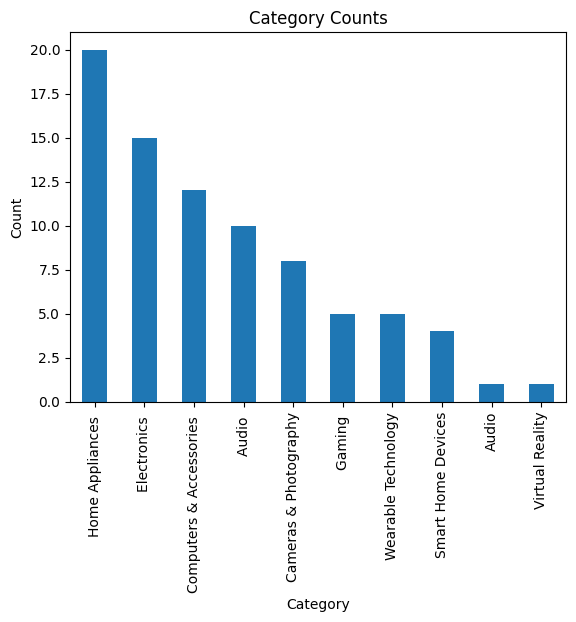

In [82]:
category_counts = merged_df['category'].value_counts()

# Create bar chart
category_counts.plot(kind='bar')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')# Show the plot
plt.show()

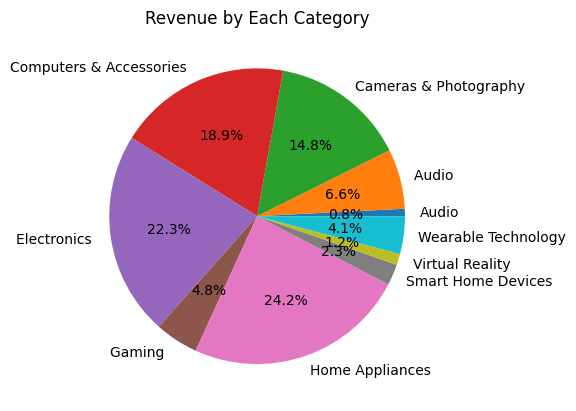

In [83]:


# Group by 'category' and sum 'price'
category_sums = merged_df.groupby('category')['total'].sum()

# Plot the result
category_sums.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue by Each Category')
plt.ylabel('')
plt.show()

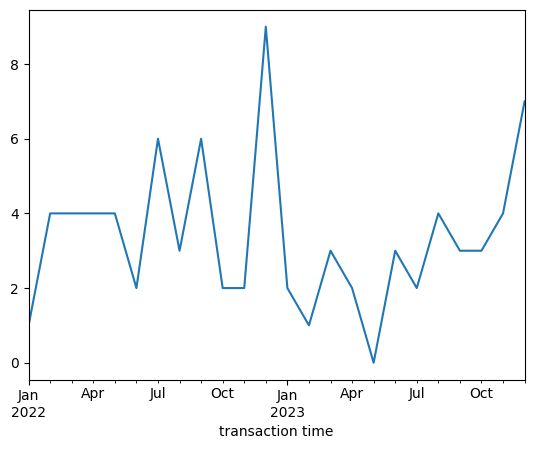

In [84]:

# Convert 'date' column to datetime if it's not already
merged_df['transaction time'] = pd.to_datetime(merged_df['transaction time'])

# Set 'date' as the index
merged_df.set_index('transaction time', inplace=True)

# Resample by month and count transactions
monthly_data = merged_df.resample('M').count()

# Plot the number of transactions per month
monthly_data['transaction_id'].plot(kind='line')

# Show the plot
plt.show()


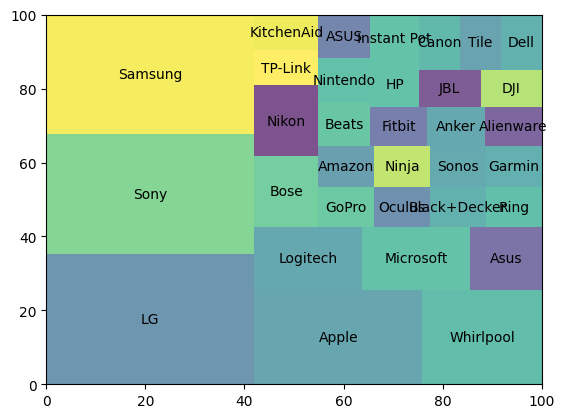

In [85]:


# Get counts of each brand
brand_counts = merged_df['brand'].value_counts()

# Create tree map
squarify.plot(sizes=brand_counts, label=brand_counts.index, alpha=0.7)


# Show the plot
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target
features = merged_df.drop(['total', 'category'], axis=1)
target = merged_df['total']

# Convert categorical data to numerical data
features = pd.get_dummies(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
predictions
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)


Mean Squared Error: 93909.34231195034
                          Actual    Predicted
transaction time                             
2022-07-06 07:46:28.087   129.99   -32.414223
2023-06-05 22:01:34.839    90.00   -72.963860
2022-11-16 07:49:14.057   700.00   700.000000
2023-12-24 16:13:36.000  1000.00   776.817433
2023-11-02 07:27:30.320    80.00  -107.730959
2022-06-25 12:59:01.033   129.00   -48.901034
2022-12-19 15:00:02.774   250.00   250.000000
2023-11-19 07:13:59.728   499.00   778.726816
2023-12-27 20:48:26.000   899.00  1468.211213
2022-07-04 13:32:16.782   800.00   800.000000
2023-06-17 11:56:57.280   170.00   151.808919
2022-03-06 17:16:07.320   800.00  1253.263827
2022-12-22 21:53:11.983   158.00   189.128435
2022-03-06 17:16:07.320   800.00  1253.263827
2023-08-08 11:46:38.000  1234.00  2008.970446
2022-12-01 08:41:54.000  1000.00   902.739890
2023-09-26 09:49:22.507   300.00   348.384022
